# How AI / ML Aids Computational Neuroscience Research

## Project Objective
The intersection of artificial intelligence (AI) and machine learning (ML) with science has the potential to revolutionize our understanding of the world. For this Personal Development Project, I aim to explore how AI/ML can aid research, specifically within the field of computational neuroscience. By reviewing relevant literature and working on simple computational projects, I hope to gain insights into how these technologies can be used to analyze brain activity, model neural networks, and further our understanding of cognitive functions.
  
This project will involve a combination of theoretical learning and practical application. Throughout the semester, I will document my progress weekly, summarizing key findings from research articles and reflecting on any challenges or breakthroughs encountered in my projects. The ultimate goal is to understand the impact of AI/ML on neuroscience research and to refine my ability to adopt and apply new knowledge in this rapidly evolving field. I will start from general to specific, so I will go from defining what AI is to implementing what I learned into a project using a public database.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks'
%ls

/content/drive/MyDrive/Colab Notebooks
 alzheimers_disease_data.csv
"Copy of Predicting Alzheimer's Disease - Data Analysis"
'Data Exploration - F23 HC7 & 8 Analysis.ipynb'
"Predicting Alzheimer's Disease - Data Analysis"
"Predicting Alzheimer's Disease - Random Forest"


## DATA UNDERSTANDING & PREPROCESSING

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
df = defog_turn = pd.read_csv('/content/drive/My Drive/Colab Notebooks/alzheimers_disease_data.csv')

In [ ]:
df.head() # This checks the first few rows of the data. You can put a number in the parentheses for a certain number of rows, but I just want to see what the dataset looks like

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [ ]:
df.shape # This checks the size of the dataset - (# of rows, # of columns)

(2149, 35)

In [ ]:
df.info() # Prints general information about the data (integer, float, Python object, etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [ ]:
print(df.columns) # Printed the names columns just to have easy access to the list (very important to track spelling errors)

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')


In [ ]:
# Drop any unnecessary columns

# df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True) - our first error hooray! let's ignore this for now
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True, errors='ignore')
# just checked the shape again, for some reason, I have 33 columns instead of 35 so colab must have automatically dropped the two columns

In [ ]:
np.transpose(df.describe()) # For all of the numerical columns, calculates summary statistics like count, mean, standard deviation, etc.

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840


In [ ]:
df.nunique() # Number of unique values

,0
Age,31
Gender,2
Ethnicity,4
EducationLevel,4
BMI,2149
Smoking,2
AlcoholConsumption,2149
PhysicalActivity,2149
DietQuality,2149
SleepQuality,2149


In [ ]:
# Check for Duplicate Rows / Missing Values
print("Duplicate Rows: ", sum(df.duplicated()))
print(df.isnull().sum())

Duplicate Rows:  0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness       

So far, I know the data set contains 2,149 patients. There are no duplicates or missing values - that means this dataset may have been cleaned already, which makes my job much easier. The only columns removed from the dataset are "PatientID" and "DoctorInCharge," so my models will be sorting through 33 features instead of 35 features.

<Axes: xlabel='Diagnosis', ylabel='count'>

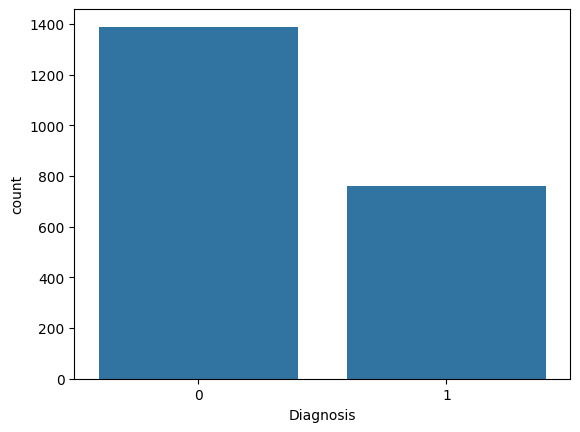

In [ ]:
sns.countplot(df, x = 'Diagnosis') # Uses seaborn to check if more patients are diagnosed or not in this dataset

This shows that the data may be skewed towards patients who do not have Alzheimer's Disease.

Now let's check demographics involving age, gender, ethnicity, and education level.

<ipython-input-18-ba4fd0568032>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  axs[0, 0].pie(df.groupby('bins').size(), labels=df.groupby('bins').size().index, autopct='%.0f%%',radius=0.8)
<ipython-input-18-ba4fd0568032>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  axs[0, 0].pie(df.groupby('bins').size(), labels=df.groupby('bins').size().index, autopct='%.0f%%',radius=0.8)


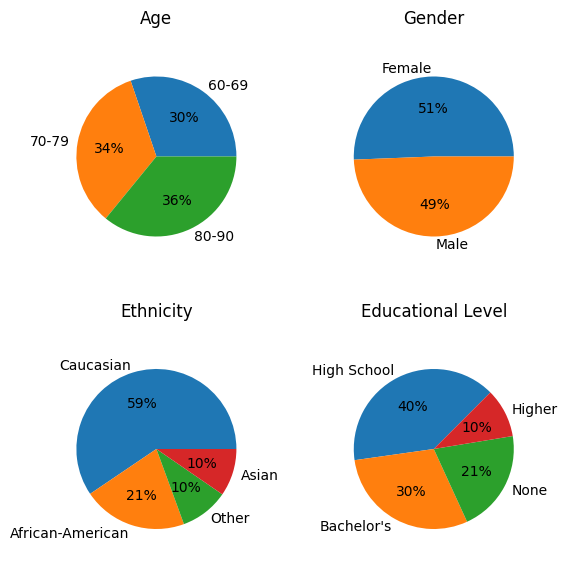

In [ ]:
# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(6, 6))

# Pie chart for Age
df['bins'] = pd.cut(df['Age'], bins=[60, 69, 79, 90], labels=["60-69", "70-79", "80-90"])
axs[0, 0].pie(df.groupby('bins').size(), labels=df.groupby('bins').size().index, autopct='%.0f%%',radius=0.8)
axs[0, 0].set_title("Age")

# Pie chart for Gender
axs[0, 1].pie(df['Gender'].value_counts(), labels=['Female', 'Male'], autopct='%.0f%%',radius=0.8)
axs[0, 1].set_title("Gender")

# Pie chart for Ethnicity
axs[1, 0].pie(df['Ethnicity'].value_counts(), labels=['Caucasian', 'African-American', 'Other', 'Asian'], autopct='%.0f%%',radius=0.8)
axs[1, 0].set_title("Ethnicity")

# Pie chart for Educational Level
axs[1, 1].pie(df['EducationLevel'].value_counts(), startangle=45, labels=['High School', "Bachelor's", 'None', 'Higher'], autopct='%.0f%%',radius=0.8)
axs[1, 1].set_title("Educational Level")

# Remove the 'bins' column from the data
df.drop(['bins'], axis=1, inplace=True)

# Adjust layout and display
plt.tight_layout()
plt.show()

- Most patients fall within 80 - 90 years old
- Gender ratio is pretty balanced
- Most patients are Caucasian
- Most education level stop at high school diploma

In [ ]:
def diagnosis_df(column_name, index_mapping):
    total = df[column_name].value_counts().sort_index()
    total.name='Total'
    diagnosis1 = df.groupby(column_name)['Diagnosis'].sum()
    percentage = diagnosis1 / total * 100
    percentage.name = 'Diagnosis, %'

    data = pd.concat([total, diagnosis1, percentage], axis=1)
    data['Total, %'] = 100
    data.index = index_mapping
    return data


print("Education Level DataFrame:")
df_educ=diagnosis_df('EducationLevel', ['None', 'High School', "Bachelor's", 'Higher'])
print(df_educ,'\n')

print("Ethnicity DataFrame:")
df_ethn=diagnosis_df('Ethnicity', ['Caucasian', 'African-American', 'Asian', 'Other'])
print(df_ethn,'\n')

print("Family History of Alzheimer's DataFrame:")
df_famh=diagnosis_df('FamilyHistoryAlzheimers', ['Yes', 'No'])
print(df_famh,'\n')

Education Level DataFrame:
             Total  Diagnosis  Diagnosis, %  Total, %
None           446        174     39.013453       100
High School    854        302     35.362998       100
Bachelor's     636        217     34.119497       100
Higher         213         67     31.455399       100 

Ethnicity DataFrame:
                  Total  Diagnosis  Diagnosis, %  Total, %
Caucasian          1278        463     36.228482       100
African-American    454        146     32.158590       100
Asian               206         84     40.776699       100
Other               211         67     31.753555       100 

Family History of Alzheimer's DataFrame:
     Total  Diagnosis  Diagnosis, %  Total, %
Yes   1607        583     36.278780       100
No     542        177     32.656827       100 



<ipython-input-20-766888df550e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df.index, y='Total, %', data=df, color='green', label='Diagnosis=0', ax=ax, ci=None)
<ipython-input-20-766888df550e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df.index, y='Diagnosis, %', data=df, color='red', label='Diagnosis=1', ax=ax, ci=None)
<ipython-input-20-766888df550e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df.index, y='Total, %', data=df, color='green', label='Diagnosis=0', ax=ax, ci=None)
<ipython-input-20-766888df550e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df.index, y='Diagnosis, %', data=df, color='red', label='Diagnosis=1', ax=ax, ci=None)
<ipython-input-20-766888df550e>:2: FutureWarning: 

The `ci` parameter is deprec

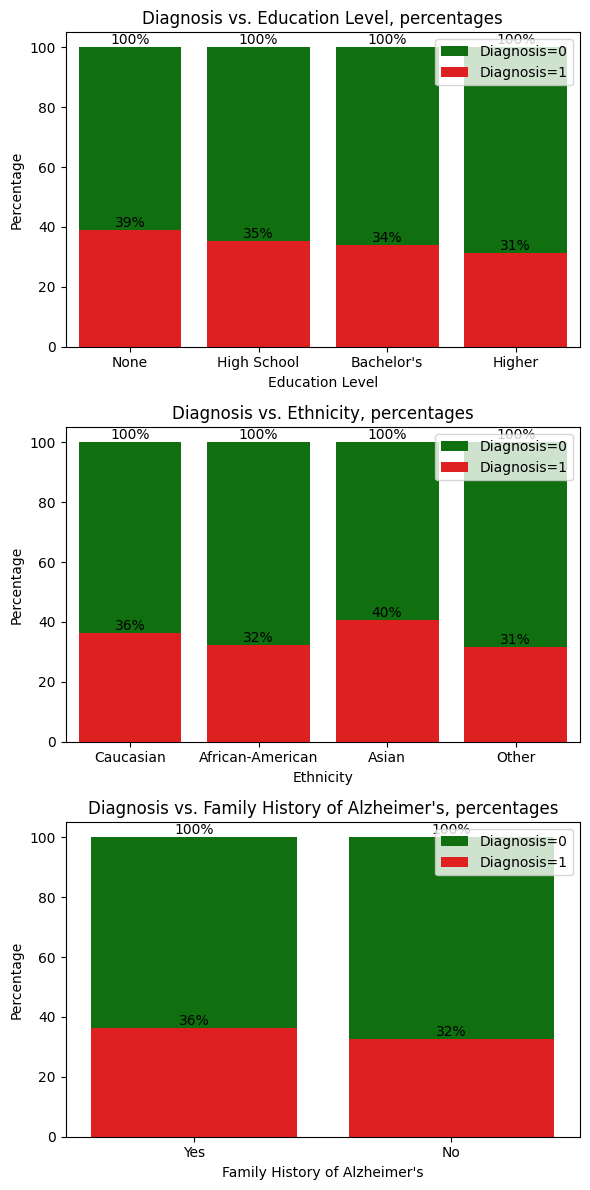

In [ ]:
def plot_diagnosis_vs_category(ax, df, category_name):
    sns.barplot(x=df.index, y='Total, %', data=df, color='green', label='Diagnosis=0', ax=ax, ci=None)
    sns.barplot(x=df.index, y='Diagnosis, %', data=df, color='red', label='Diagnosis=1', ax=ax, ci=None)
    ax.set_title(f"Diagnosis vs. {category_name}, percentages")
    ax.set_xlabel(category_name)
    ax.set_ylabel('Percentage')
    ax.legend()
    for container in ax.containers:
        labels = [f'{int(v.get_height())}%' for v in container]
        ax.bar_label(container, labels=labels, label_type='edge')

fig, axs = plt.subplots(3, 1, figsize=(6, 12))

plot_diagnosis_vs_category(axs[0], df_educ, "Education Level")
plot_diagnosis_vs_category(axs[1], df_ethn, "Ethnicity")
plot_diagnosis_vs_category(axs[2], df_famh, "Family History of Alzheimer's")
plt.tight_layout()
plt.show()


Diagnosis vs. Education Level: The data shows a slight decrease along the x-axis, suggesting that higher levels of education might be associated with a lower risk of Alzheimer's Disease (AD).

Diagnosis vs. Ethnicity: The results indicate a small increase in the risk of Alzheimer's Disease (AD) for individuals of Asian descent.

Diagnosis vs. Family History of Alzheimer's: The analysis indicates no clear effect, meaning that family history doesn’t appear to significantly impact the risk of Alzheimer's Disease (AD) in this dataset.

In [ ]:
numerical_columns = [col for col in df.columns if df[col].nunique() > 5]

# Identify categorical features that are not 'Diagnosis'
categorical_columns = df.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()

print("Numerical cols:", len(numerical_columns))
print("Categorical cols:", len(categorical_columns))

Numerical cols: 15
Categorical cols: 17


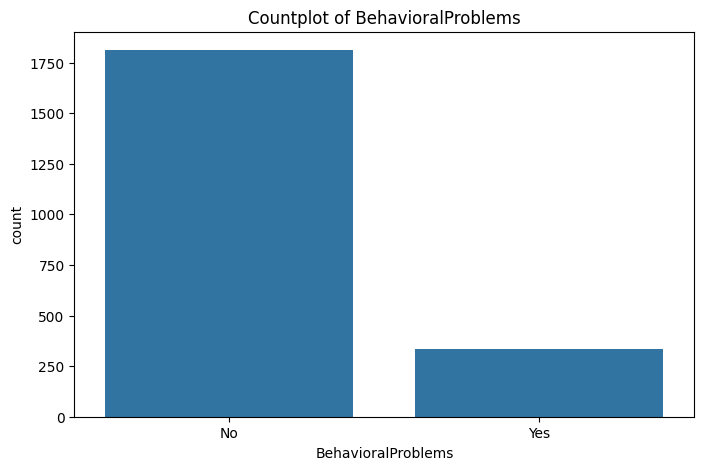

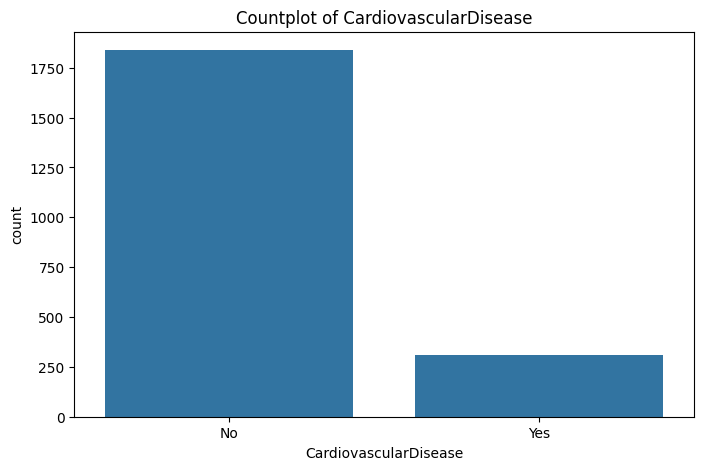

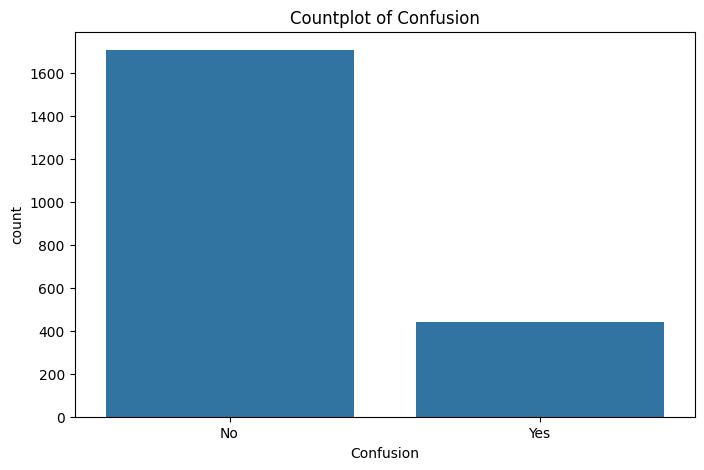

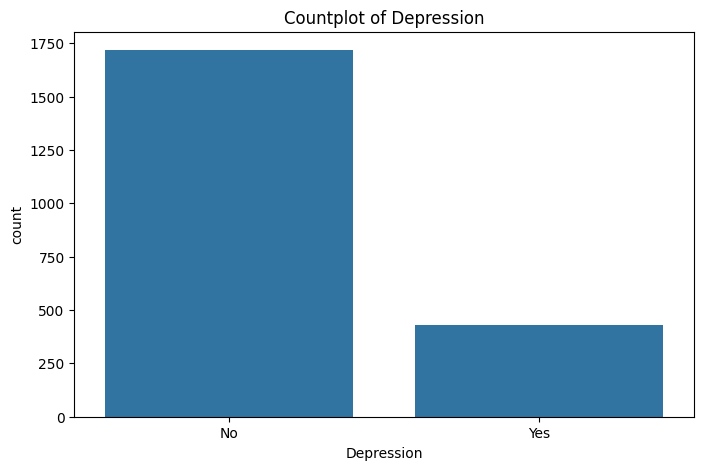

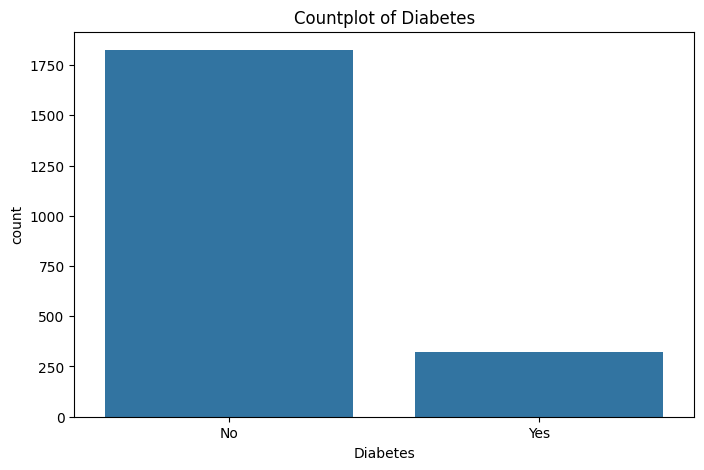

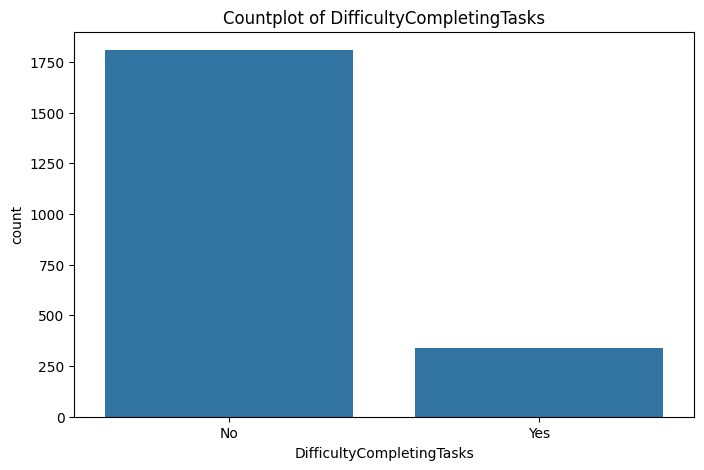

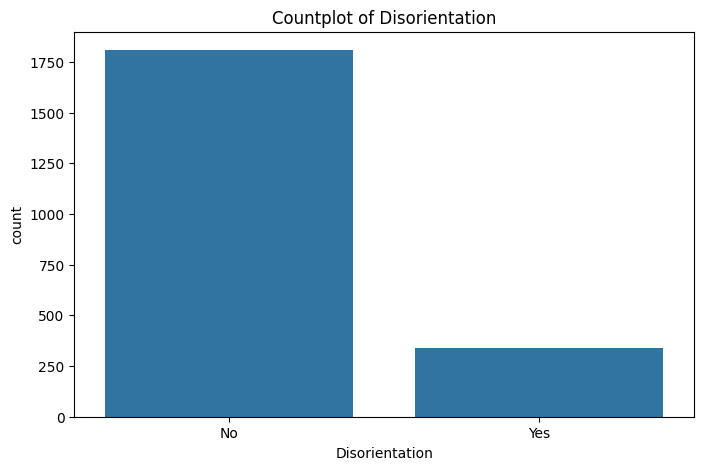

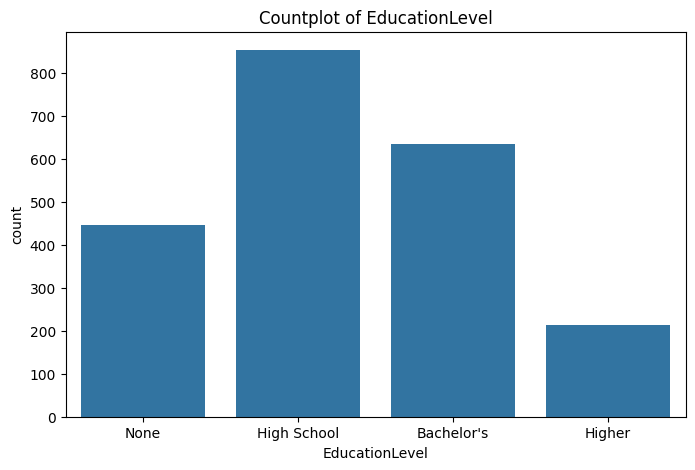

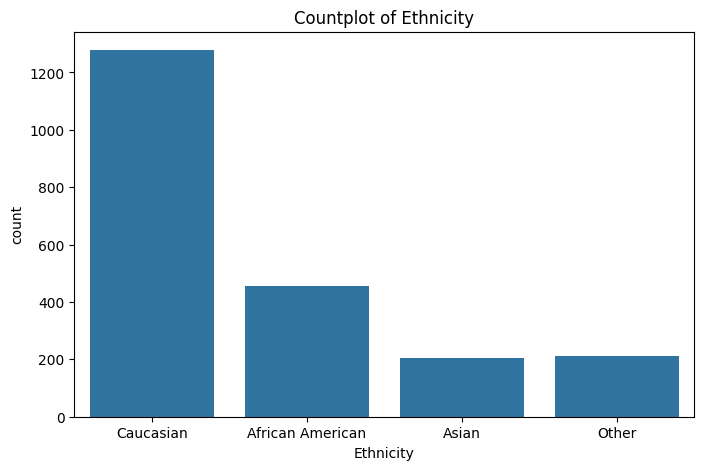

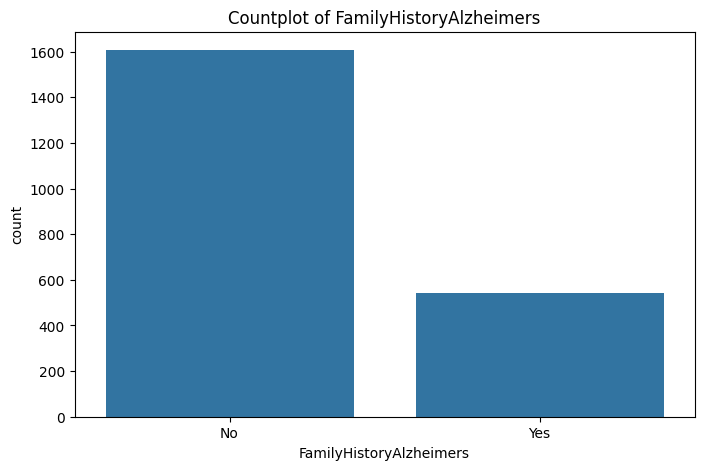

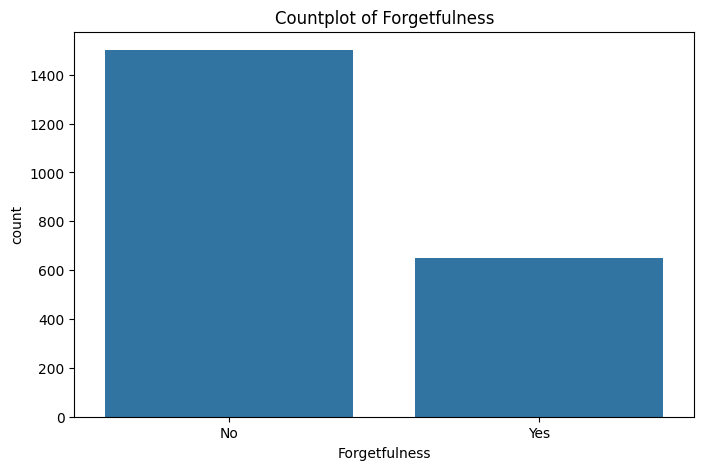

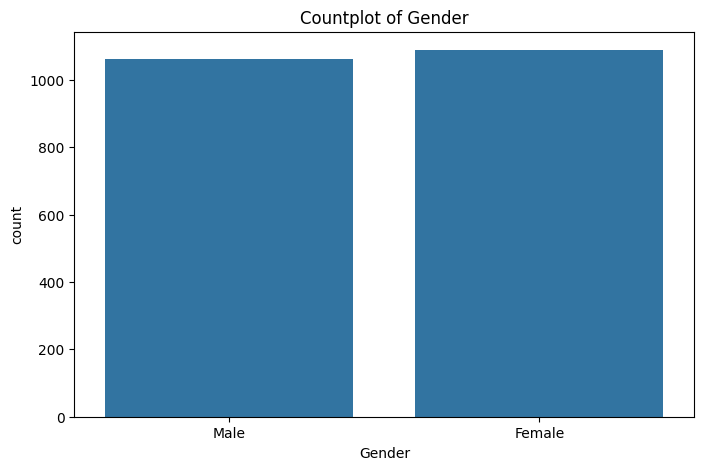

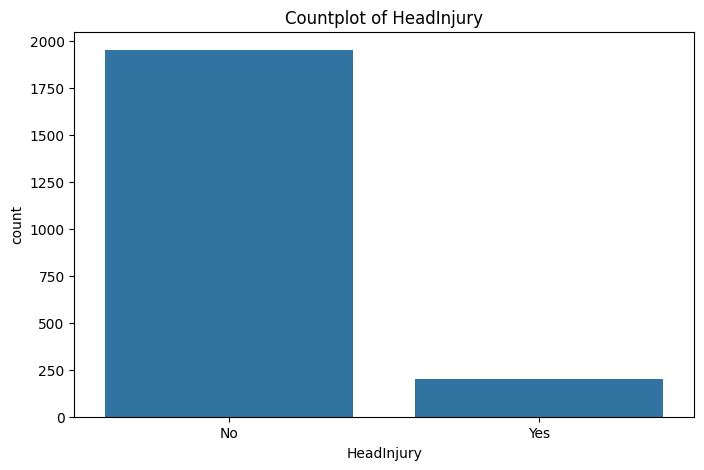

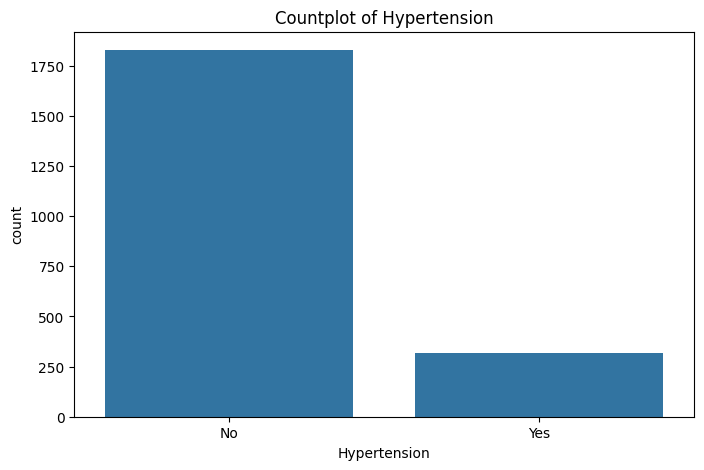

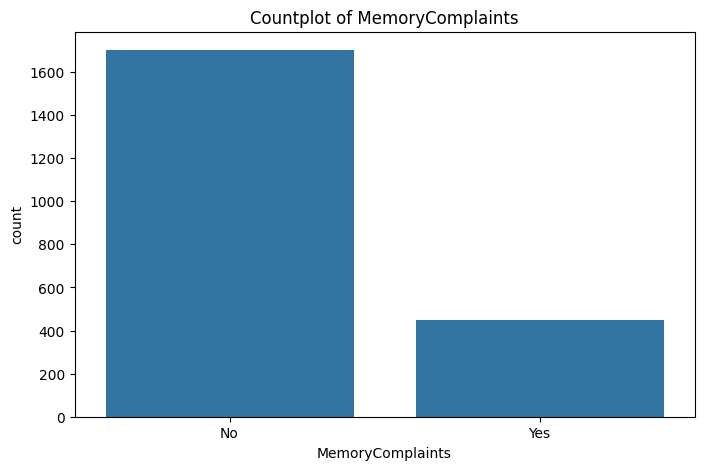

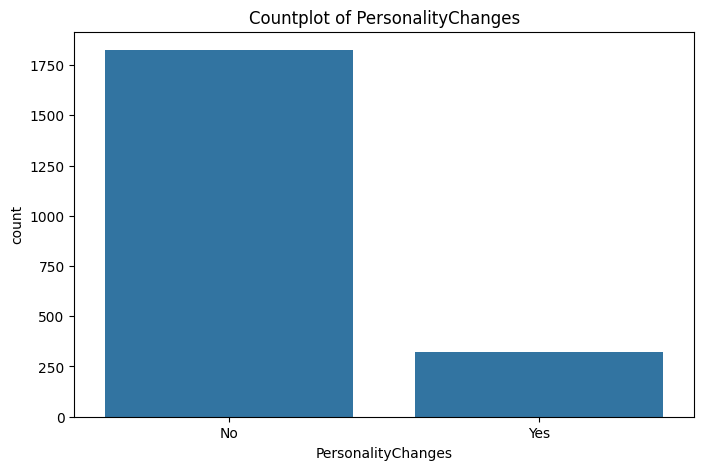

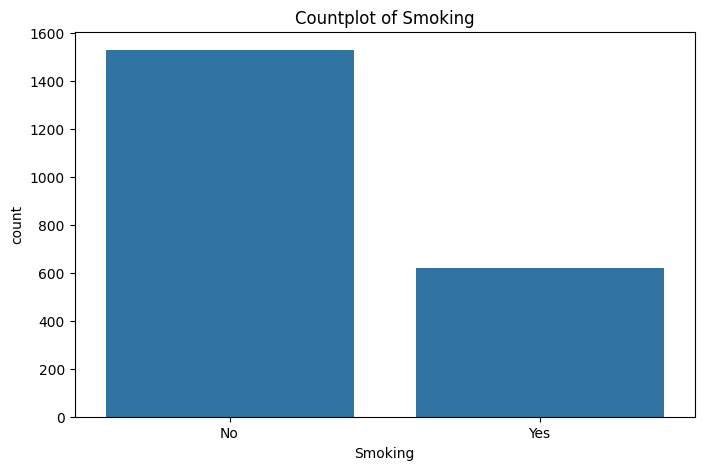

In [ ]:
# Custom labels for the categorical columns
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}

# Plot countplots for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot of {col}')

    # Directly set custom labels
    labels = custom_labels[col]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)

    plt.show()

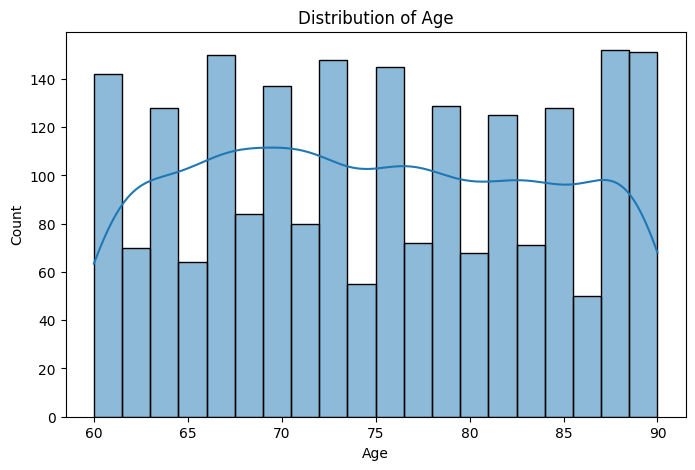

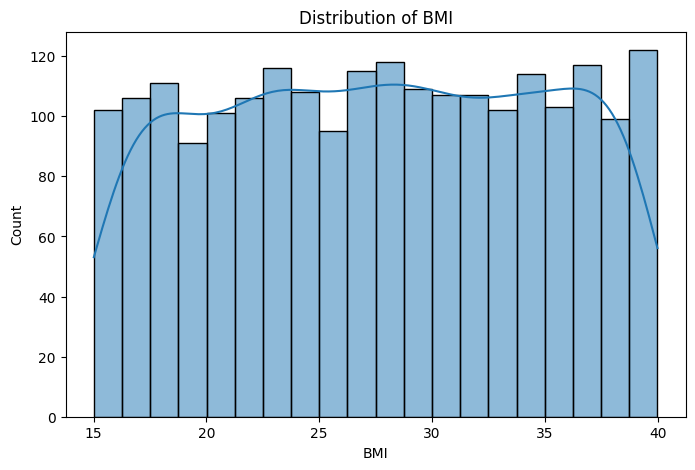

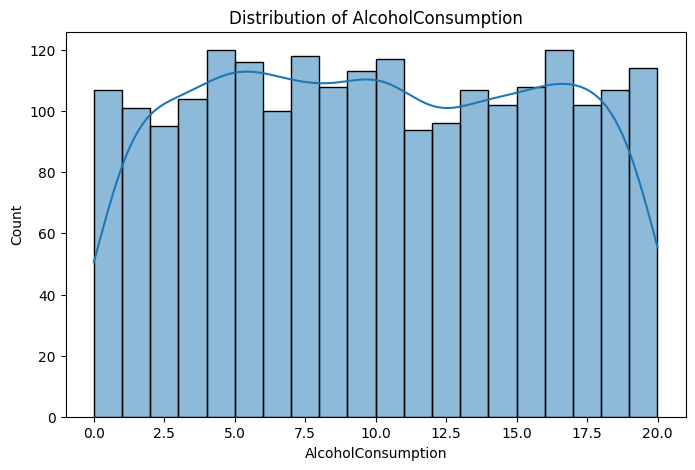

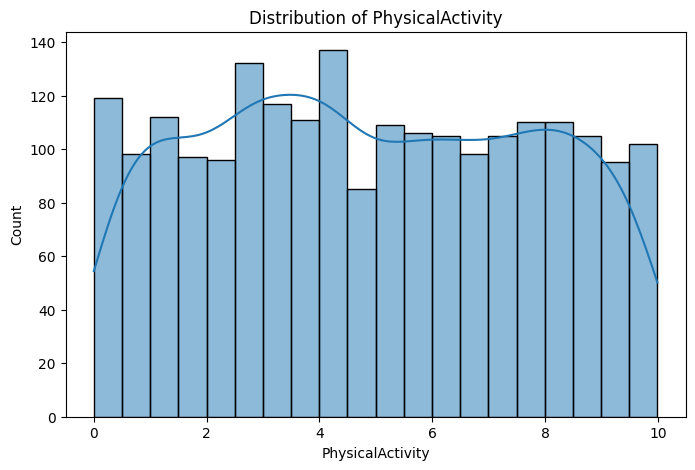

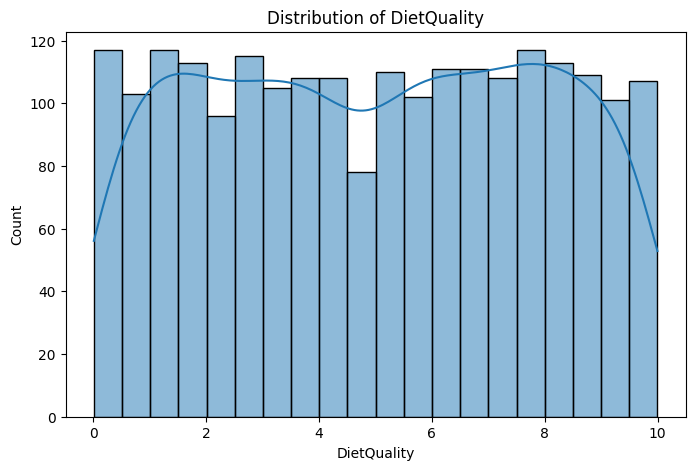

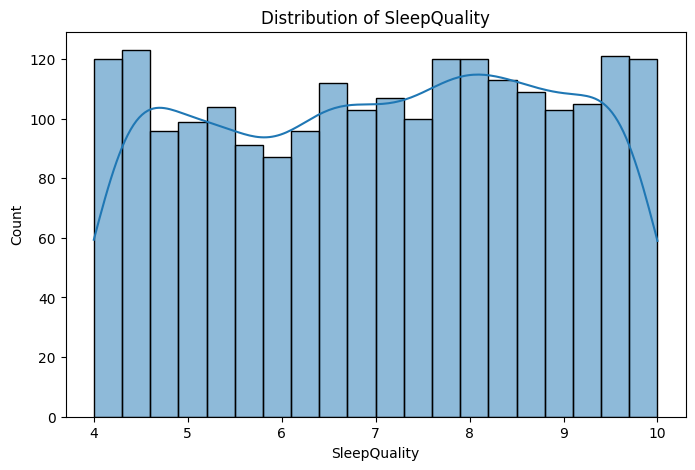

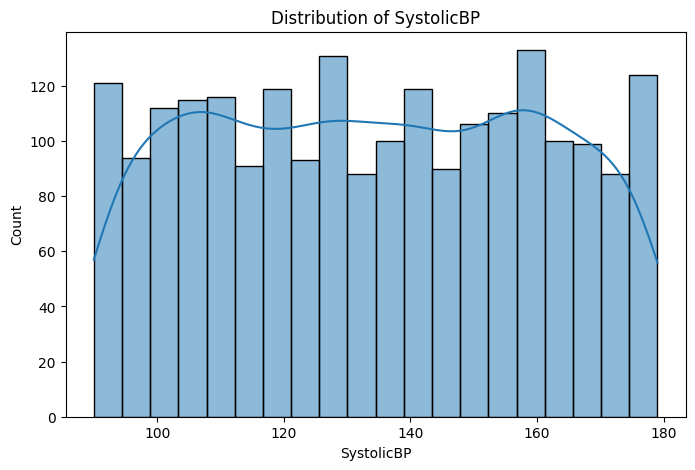

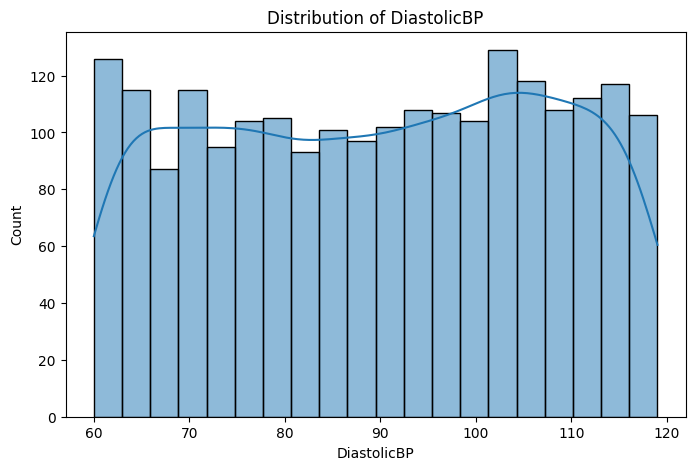

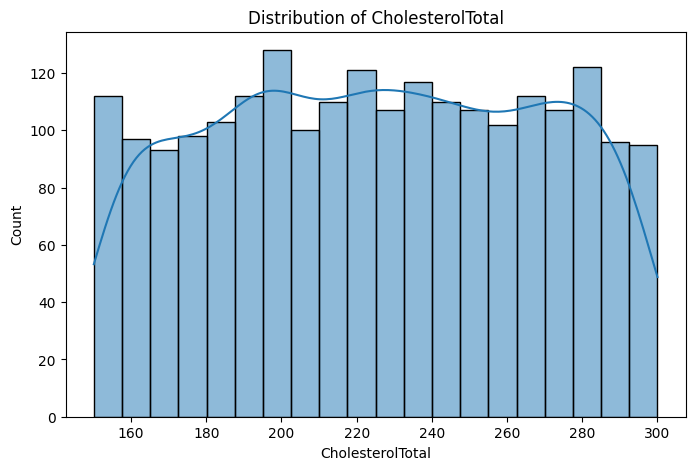

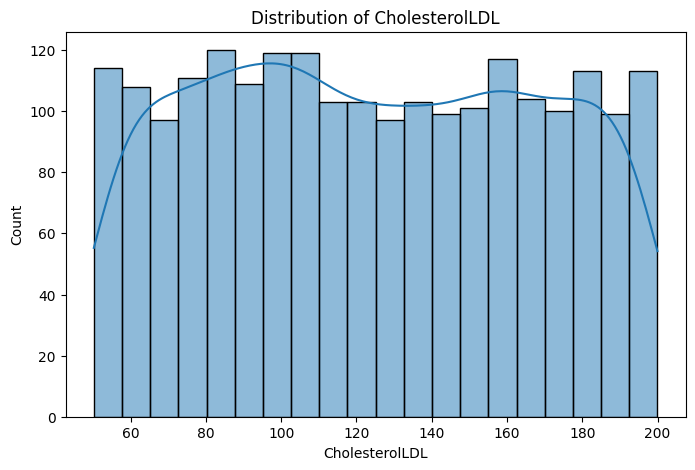

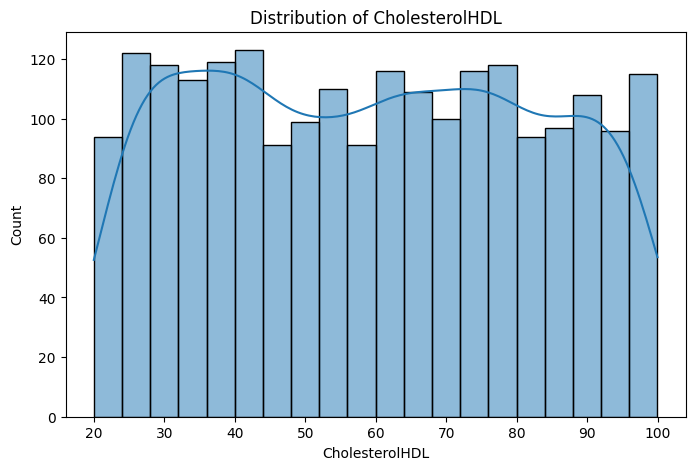

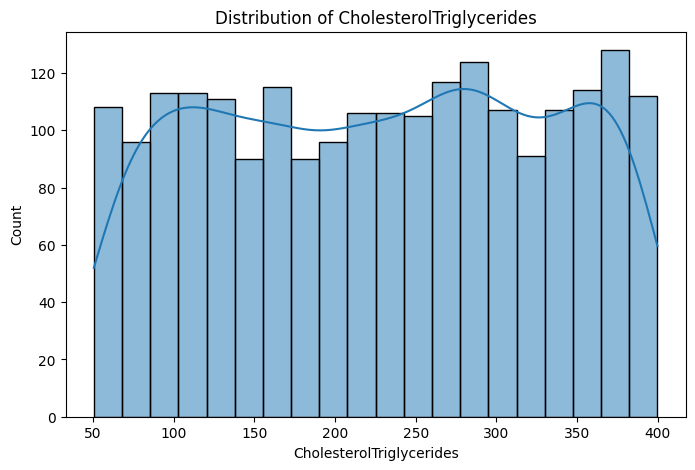

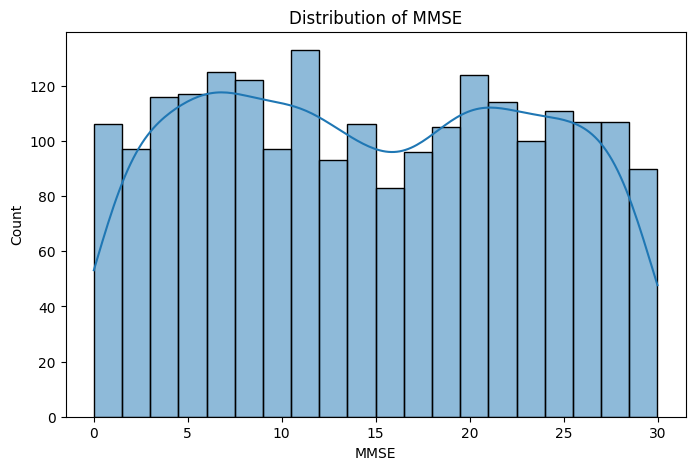

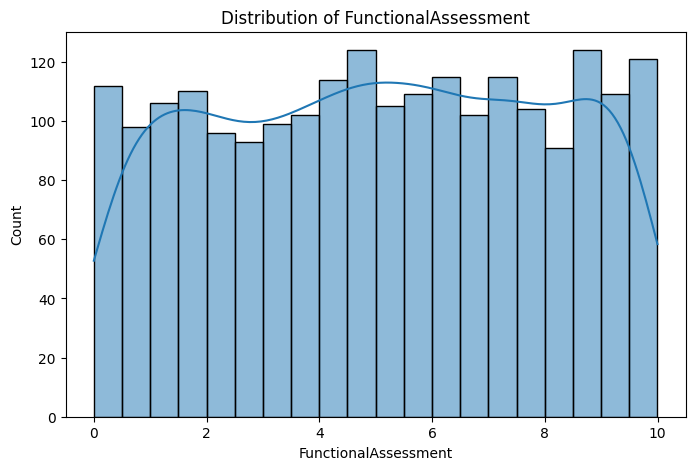

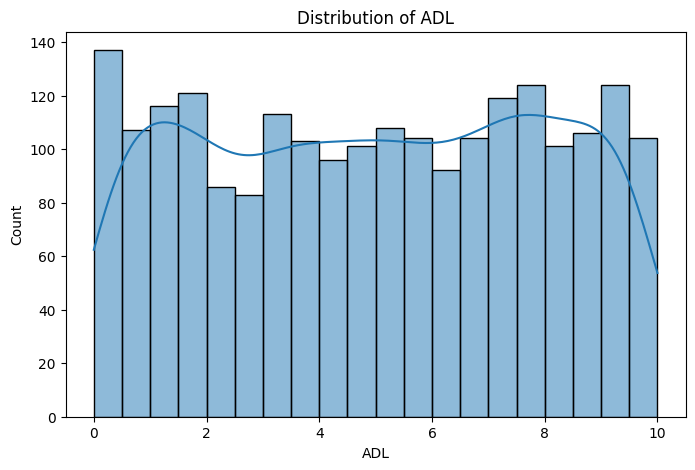

In [ ]:
# Plot histogram for all columns
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

Most of the data's features have uniform/rectangular distribution, except for MMSE (Mini-Mental State Examination) which seems to be bimodal since there are two separate groups.

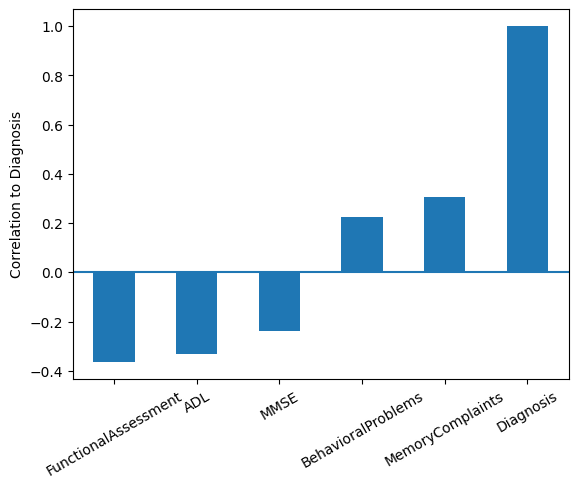

In [ ]:
corr_matrix=df.corr()['Diagnosis']
heatcol=df.columns[corr_matrix.abs() > 0.1]
df[heatcol].corr()['Diagnosis'].sort_values().plot(kind='bar')
plt.axhline(0)
plt.ylabel('Correlation to Diagnosis')
plt.xticks(rotation=30)
plt.show()

As expected, lower scores in functional assessments, activities of daily living (ADL), and mental state exams (MMSE), along with higher rates of behavioral issues and memory complaints, are associated with Alzheimer's Disease diagnoses.

This concludes my data analysis from Week 5 & 6!

In [ ]:
# Here is the update on the chi-square tests:
import scipy.stats as stats

def calculate_chi_square(data, description):
    # Calculate the 'Not' column
    df['Not'] = data['Total'] - df['Diagnosis']

    # Create the observed values array
    observed = np.array(df[['Diagnosis', 'Not']].values)

    # Perform the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(observed)

    # Print the p-value with the description
    print(f"{description} p-value: {round(p,3)}")

calculate_chi_square(df_educ, 'EducationLevel')
calculate_chi_square(df_ethn, 'Ethnicity')
calculate_chi_square(df_famh, 'FamilyHistoryAlzheimers')

EducationLevel p-value: nan
Ethnicity p-value: nan
FamilyHistoryAlzheimers p-value: nan


Still getting "nan" values. That means "not a number." Not sure what the problem is.

Now that I've analyzed the data by visualizing it, I will prepare the data for model training. This involves feature and target separation through train-test split.

## MODEL TRAINING

In [ ]:
X = df.drop(columns=['Diagnosis']) # Features are every column but Diagnosis
y = df['Diagnosis'] # Label is Diagnosis

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

I will only be testing 20% of the data, as this is a sufficient amount for this large dataset.

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
pred_rfc= rfc.predict(X_test)
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       283
           1       0.94      0.91      0.93       147

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
pred_gbc= gbc.predict(X_test)
print(classification_report(y_test,pred_gbc))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       283
           1       0.93      0.93      0.93       147

    accuracy                           0.95       430
   macro avg       0.95      0.95      0.95       430
weighted avg       0.95      0.95      0.95       430



**Adaptive Boosting (AdaBoost)**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(random_state=42)
adaboost.fit(X_train, y_train)
pred_adaboost= adaboost.predict(X_test)
print(classification_report(y_test, pred_adaboost))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       283
           1       0.91      0.88      0.90       147

    accuracy                           0.93       430
   macro avg       0.93      0.92      0.92       430
weighted avg       0.93      0.93      0.93       430



**XGBoost**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train,y_train)
pred_xgb = xgb.predict(X_test)
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       283
           1       0.94      0.92      0.93       147

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)
pred_log = log.predict(X_test)
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       283
           1       0.79      0.63      0.70       147

    accuracy                           0.82       430
   macro avg       0.81      0.77      0.78       430
weighted avg       0.81      0.82      0.81       430



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train, y_train)
pred_nbc = nbc.predict(X_test)
print(classification_report(y_test,pred_nbc))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       283
           1       0.83      0.71      0.76       147

    accuracy                           0.85       430
   macro avg       0.84      0.81      0.83       430
weighted avg       0.85      0.85      0.85       430



**Support Vector Machine (SVM)**

In [ ]:
from sklearn.metrics import classification_report

from sklearn.svm import SVC
svc = SVC(kernel='linear',random_state=42)
svc.fit(X_train, y_train)
pred_svc= svc.predict(X_test)
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       283
           1       0.86      0.78      0.82       147

    accuracy                           0.88       430
   macro avg       0.88      0.86      0.87       430
weighted avg       0.88      0.88      0.88       430



**Neural Network Collection (NNC)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

nnc=Sequential()
nnc.add(Input(shape=(X_train.shape[1],)))
nnc.add(BatchNormalization())
nnc.add(Dense(128,'relu'))
nnc.add(Dropout(0.5))
nnc.add(BatchNormalization())
nnc.add(Dense(128,'relu'))
nnc.add(Dropout(0.5))
nnc.add(BatchNormalization())
nnc.add(Dense(128,'relu'))
nnc.add(Dropout(0.5))
nnc.add(BatchNormalization())
nnc.add(Dense(64,'relu'))
nnc.add(Dropout(0.5))
nnc.add(Dense(32,'relu'))
nnc.add(Dropout(0.5))
nnc.add(Dense(16,'relu'))
nnc.add(Dropout(0.5))
nnc.add(Dense(1,'sigmoid'))
nnc.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['binary_accuracy'])
early=EarlyStopping(monitor='val_loss',patience=10,min_delta=0.001,restore_best_weights=True)
history=nnc.fit(X_train,y_train,epochs=250,batch_size=128,validation_data=(X_test,y_test),callbacks=[early])
pred_nnc=(nnc.predict(X_test) > 0.4).astype("int32")

Epoch 1/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - binary_accuracy: 0.5356 - loss: 1.0465 - val_binary_accuracy: 0.4488 - val_loss: 0.7137
Epoch 2/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - binary_accuracy: 0.5182 - loss: 0.9282 - val_binary_accuracy: 0.6140 - val_loss: 0.6762
Epoch 3/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - binary_accuracy: 0.5556 - loss: 0.8227 - val_binary_accuracy: 0.6558 - val_loss: 0.6665
Epoch 4/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - binary_accuracy: 0.5469 - loss: 0.8048 - val_binary_accuracy: 0.6558 - val_loss: 0.6670
Epoch 5/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - binary_accuracy: 0.5656 - loss: 0.7684 - val_binary_accuracy: 0.6558 - val_loss: 0.6701
Epoch 6/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - binary_accuracy: 0.5815 - loss: 0.7257 - val_binary_accuracy: 0.6581 - val_loss: 0.6709
Epoch 7/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - binary_accuracy: 0.5780 - loss: 0.7350 - val_binary_accuracy: 0.6581 - val_loss: 0.6712
Epoch

In [ ]:
print(classification_report(y_test,pred_nnc))

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       283
           1       0.34      1.00      0.51       147

    accuracy                           0.34       430
   macro avg       0.67      0.50      0.26       430
weighted avg       0.78      0.34      0.18       430

